In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
df = pd.read_csv('/Users/hunterpeterson/Downloads/constituents_csv.csv')
sentiment_df = pd.read_csv('/Users/hunterpeterson/Downloads/archive/all-data.csv', encoding='ISO-8859-1', names=['Sentiment', 'Headline'])

In [3]:
y = sentiment_df['Sentiment']
x = sentiment_df['Headline']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(x_train, y_train)

labels = model.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

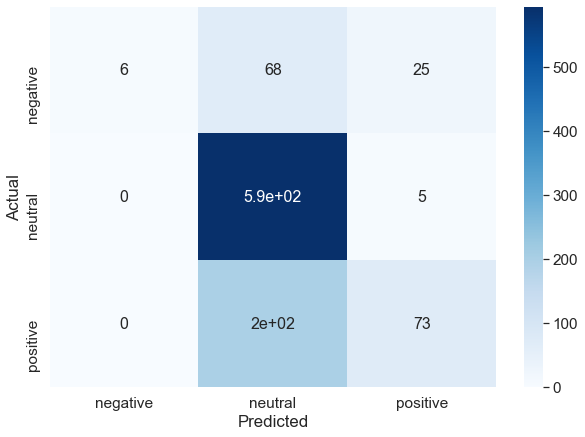

In [4]:
mat = confusion_matrix(y_test, labels)

df_hm = pd.DataFrame(mat, columns=np.unique(y_test), index=np.unique(labels))
df_hm.index.name = 'Actual'
df_hm.columns.name = 'Predicted'
plt.figure(figsize = (10, 7))
sns.set(font_scale=1.4)
sns.heatmap(df_hm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [5]:
scores = cross_val_score(model, x, y, cv=5)
scores.mean()

0.6508325088038471